#EFT

In [ ]:
import sys
!{sys.executable} -m pip install textblob

import sys
!{sys.executable} -m pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.3 MB/s eta 0:00:00


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.2 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1270 sha256=7d53b3c45a071e5313a35e746a81724b5d33e6c0b199af22fbb1d32bb979e0d1
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24589 sha256=80c8d06d8d6ce9be9ddc723dd032faac94fbee7ecb34fd7f2d4cbcaa40768dda
  Stored in directory: /root/.cache/pip/wheels/70/4b/f0/e

In [ ]:
pip install requests_html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import yfinance as yfin
from yahoo_fin import news
from datetime import datetime
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
import pandas_datareader.data as pdr

import datetime as dt

The following additional etf/index: 

- The SPDR MSCI Europe Consumer Discretionary UCITS ETF (STR.PA):  tracks the MSCI Europe Consumer Discretionary 20/35 Capped Index. The ETF’s inception date is Dec. 5, 2014. Its top holdings include LVMH Moet Hennessy Louis Vuitton SE, Daimler, Kering, Richemont, Hermes, Adidas, Prosus, Essilor, Volkswagen, and Stellantis NV

- STOXX Europe 600 (STOXX):  600 components representing large, mid and small capitalization companies among 17 European countries, covering approximately 90% of the free-float market capitalization of the European stock market. Inceptiond date 2004

- The MSCI Emerging Markets Asia (EEMA)index tracks large and mid cap companies from Asian emerging markets. Inception data: 2012

- Xtrackers Harvest CSI 300 China A-Shares ETF: ASHR seeks to track the CSI 300 Index, an index comprising 300 large- and mid-cap China A-Share stocks listed on the Shenzhen or Shanghai Stock Exchange.  The top holdings of ASHR include Class A shares of Kweichow Moutai, Contemporary Amperex Technology, and Ping An Insurance (Group) Company of China, Ltd. (601318:SHG), a conglomerate offering insurance, banking, asset management, financial, and other services. Nov. 6, 2013

- The 10-Year Treasury (TNX) index  tracks indirectly the interest rate. Creation: 1985

- Global X Millennials Consumer ETF (MILN): It’s a fund that seeks to invest in companies that have a high likelihood of benefiting from the rising spending power and unique preferences of the U.S. Millennial generation,” Palandrani says. “As of today, you’ll see companies such as Peloton (PTON), Lululemon (LULU), Apple (AAPL), Starbucks (SBUX), and others, which tend to have premium pricing but also strong customer loyalty.” = Inception 2016






In [ ]:
import yfinance as yf

def get_data(ticker):
  #adapt the date to what you want, I put the inception date for each ETF you can go as far as 2016. 
  start_date = '2017-01-01'

  tick= yf.Ticker(ticker)
  data = tick.history(start=str(start_date),end=str(dt.date.today()))
  data.index = pd.to_datetime(data.index).date
  data=data[["Open","Close"]]
  data["return"+ticker]= ((data["Close"]- data["Open"])/data["Open"])*100
  data = data.rename(columns={'Open': 'open'+ticker})
  data = data.rename(columns={'Close': 'close'+ticker})
  data=data[['open'+ticker]]
  return data

def missing_val (data):
  # replace missing value by the average between the next value and the on before. It doesn't work in missing value is a the last or first row of the dataset three observations  consecutively  have missing values for the column
  data = data.fillna((data.shift() + data.shift(-1)) / 2) 
  #we had this line to deal with missing in the last or first row of the dataset
  data = data.fillna(data.shift())
  data = data.fillna(data.shift(-1))
  #adding a line to prevent misisng values if 3 rows are missing consecutively 
  data = data.fillna((data.shift(2) + data.shift(-2)) / 2) 
  return data

def mergedata ():

  strpa= get_data("STR.PA")
  stoxx= get_data("^STOXX")
  emma= get_data("EEMA")
  ashr= get_data("ASHR")
  tnx= get_data("^TNX")
  miln= get_data("MILN")
  merged_df = strpa.merge(stoxx, left_index=True, right_index=True, how='outer') \
              .merge(emma, left_index=True, right_index=True, how='outer') \
              .merge(ashr, left_index=True, right_index=True, how='outer') \
              .merge(tnx, left_index=True, right_index=True, how='outer') \
              .merge(miln, left_index=True, right_index=True, how='outer')
  
  merged_df=missing_val(merged_df)
  return merged_df



In [ ]:
df=mergedata()
df

,openSTR.PA,open^STOXX,openEEMA,openASHR,open^TNX,openMILN
2017-01-02,105.120003,364.250000,47.353229,22.435773,2.511,15.409928
2017-01-03,106.830002,364.250000,47.353229,22.435773,2.511,15.409928
2017-01-04,106.339996,365.609985,47.846400,22.859984,2.456,15.421647
2017-01-05,104.949997,364.019989,48.276809,23.114506,2.439,15.497817
2017-01-06,105.349998,365.070007,48.249905,22.973104,2.339,15.584731
...,...,...,...,...,...,...
2023-05-02,174.059998,466.519989,64.930000,28.799999,3.532,30.070000
2023-05-03,173.119995,461.760010,64.360001,28.870001,3.418,29.799999
2023-05-04,172.899994,459.980011,64.599998,29.030001,3.345,29.469999
2023-05-05,173.860001,460.190002,64.970001,29.000000,3.397,29.620001


The misisng value function needs adaptation because it depends on the end and start time. It won't remove the missing values if:
- missing value is a the last or first row of the dataset
- three observations sequentially have missing values for the column

That is why I added other line of code to fight against this. But further change might be required. In case check if there are missing value





In [ ]:

total_missing_values = df.isna().sum().sum()
print(total_missing_values)

0


#Ingesting the prices

In [ ]:
yfin.pdr_override()

In [ ]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

def get_stock_prices(start_year, stock_list):
    start_date = str(dt.date(start_year, 1, 1))
    end_date = str(dt.date.today())
    prices = pd.DataFrame()
    
    for stock in stock_list:
        data = pdr.get_data_yahoo(stock, start=start_date, end=end_date)
        data.index = pd.to_datetime(data.index).date
        data=data[["Open","Close"]]
        data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100
        data = data.rename(columns={'Open': 'open'+stock})
        data = data.rename(columns={'Close': 'close'+stock})
        data=data[['open'+stock]]
        prices = prices.merge(data, left_index=True, right_index=True, how='outer')   
    prices=missing_val(prices)
    return prices


In [ ]:
prices = get_stock_prices(2017,['MC.PA', 'RMS.PA', 'CDI.PA', 'CFR.SW', 'LULU', 'MONC.MI', 'UHR.SW', 'VFC', 'PNDORA.CO', 'RL', '2020.HK', 'TITAN.NS', '1929.HK', '1913.HK', "2331.HK", "2313.HK", "BC.MI", "GIL.TO","PAGEIND.NS", "BOSS.DE", "PVH", "3998.HK" ])
prices.head()

[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100
<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


[*********************100%***********************]  1 of 1 completed


<ipython-input-12-9b858796fca0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"+ stock]= ((data["Close"]- data["Open"])/data["Open"])*100


,openMC.PA,openRMS.PA,openCDI.PA,openCFR.SW,openLULU,openMONC.MI,openUHR.SW,openVFC,openPNDORA.CO,openRL,...,open1929.HK,open1913.HK,open2331.HK,open2313.HK,openBC.MI,openGIL.TO,openPAGEIND.NS,openBOSS.DE,openPVH,open3998.HK
2017-01-02,181.350006,389.000000,199.399994,68.250000,65.940002,16.410000,319.200012,50.499058,924.0,91.269997,...,5.99,27.049999,4.86,48.700001,20.490000,34.259998,13787.299805,58.099998,90.959999,0.67
2017-01-03,182.100006,394.700012,201.699997,68.250000,65.940002,16.860001,319.200012,50.499058,932.0,91.269997,...,5.99,27.049999,4.86,48.700001,20.549999,34.259998,14075.000000,59.299999,90.959999,0.67
2017-01-04,180.449997,392.600006,201.199997,67.000000,66.970001,16.799999,315.100006,50.593220,907.0,91.000000,...,6.01,27.000000,4.90,48.349998,20.459999,34.130001,13909.000000,58.169998,91.540001,0.67
2017-01-05,177.350006,388.700012,196.500000,66.550003,68.430000,16.400000,312.799988,50.112995,885.5,88.620003,...,6.11,27.049999,4.99,48.000000,20.120001,34.009998,13890.000000,57.250000,90.599998,0.69
2017-01-06,177.100006,387.500000,195.250000,66.150002,68.739998,16.410000,310.799988,50.000000,871.0,89.269997,...,6.13,28.000000,5.00,48.650002,20.590000,34.009998,13920.849609,55.660000,92.690002,0.69


In [ ]:
def merging12 (prices, merged): 
  df_final = prices.merge(merged, left_index=True, right_index=True, how='outer')   
  df_final=missing_val(df_final)
  return df_final

df_final=merging12(prices, df)
print(df_final)

             openMC.PA   openRMS.PA  openCDI.PA  openCFR.SW    openLULU  \
2017-01-02  181.350006   389.000000  199.399994   68.250000   65.940002   
2017-01-03  182.100006   394.700012  201.699997   68.250000   65.940002   
2017-01-04  180.449997   392.600006  201.199997   67.000000   66.970001   
2017-01-05  177.350006   388.700012  196.500000   66.550003   68.430000   
2017-01-06  177.100006   387.500000  195.250000   66.150002   68.739998   
...                ...          ...         ...         ...         ...   
2023-05-02  874.099976  1970.400024  829.500000  147.050003  383.179993   
2023-05-03  870.000000  1958.000000  827.500000  148.699997  381.529999   
2023-05-04  877.200012  1990.000000  839.000000  150.000000  383.119995   
2023-05-05  879.400024  1993.000000  836.500000  148.899994  385.329987   
2023-05-08  880.000000  1988.000000  839.000000  149.000000  387.989990   

            openMONC.MI  openUHR.SW    openVFC  openPNDORA.CO      openRL  \
2017-01-02    16.41000

#PairsTrade

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

[('open2020.HK', 'openMILN'), ('open1929.HK', 'open^STOXX'), ('openBC.MI', 'openGIL.TO'), ('openBC.MI', 'openPAGEIND.NS'), ('openBC.MI', 'openBOSS.DE'), ('openBC.MI', 'openPVH'), ('openBC.MI', 'open3998.HK'), ('openBC.MI', 'openSTR.PA'), ('openBC.MI', 'open^STOXX'), ('openBC.MI', 'openEEMA'), ('openBC.MI', 'openASHR'), ('openBC.MI', 'open^TNX'), ('openBC.MI', 'openMILN'), ('openEEMA', 'openASHR')]
14


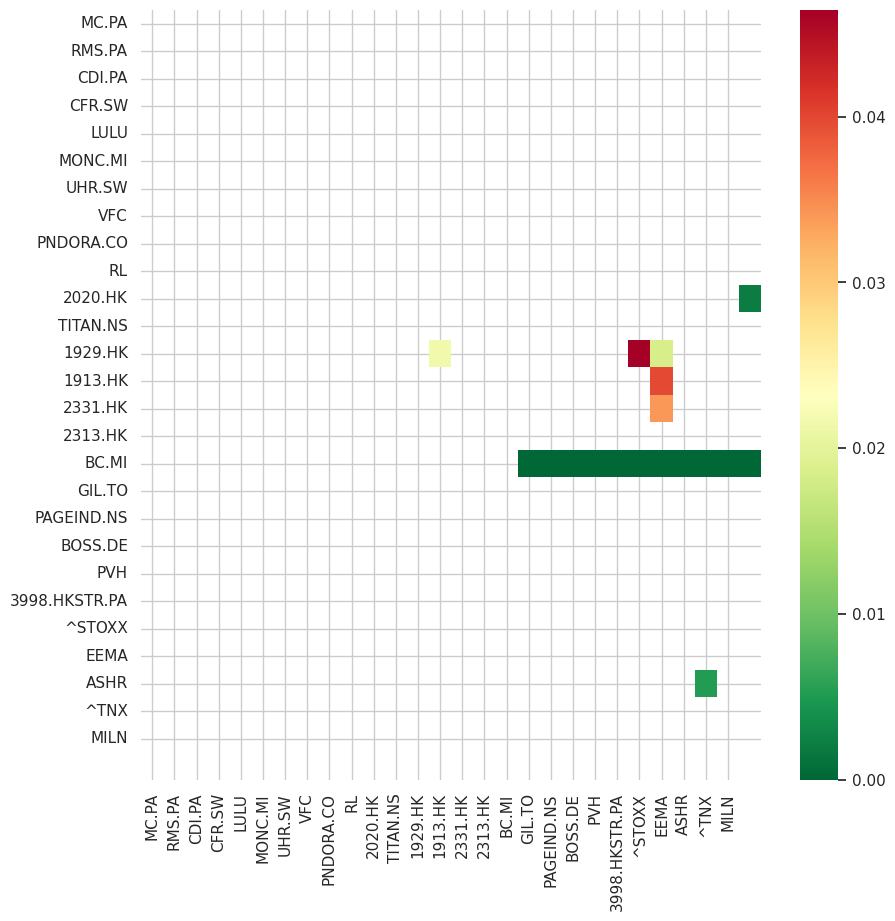

In [ ]:

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import seaborn



tickers=['MC.PA', 'RMS.PA', 'CDI.PA', 'CFR.SW', 'LULU', 'MONC.MI', 'UHR.SW', 'VFC', 'PNDORA.CO', 'RL', '2020.HK', 'TITAN.NS', '1929.HK', '1913.HK', "2331.HK", "2313.HK", "BC.MI", "GIL.TO","PAGEIND.NS", "BOSS.DE", "PVH", "3998.HK" "STR.PA","^STOXX","EEMA", "ASHR","^TNX" ,"MILN"]
scores, pvalues, pairs = find_cointegrated_pairs(df_final)
fig, ax = plt.subplots(figsize=(10,10))
seaborn.heatmap(pvalues, xticklabels=tickers, yticklabels=tickers, cmap='RdYlGn_r' 
                , mask = (pvalues >= 0.05) #threshold being 0.05
                )
print(pairs)
print(len(pairs))


#Version 2 BASKET

In [ ]:
basket=df_final
basket["basket1end"]= basket["open2020.HK"]+ basket["open1929.HK"] + basket["openBC.MI"]+ basket["openEEMA"]

basket["basket2end"]= basket["openMILN"]+ basket["open^STOXX"]+ basket["openGIL.TO"]+ basket["openASHR"]

basket=basket[["basket1end","basket2end"]]



S1 = basket['basket1end']
S2 = basket['basket2end']

score, pvalue, _ = coint(S1, S2)
pvalue

1.0782657606803004e-10

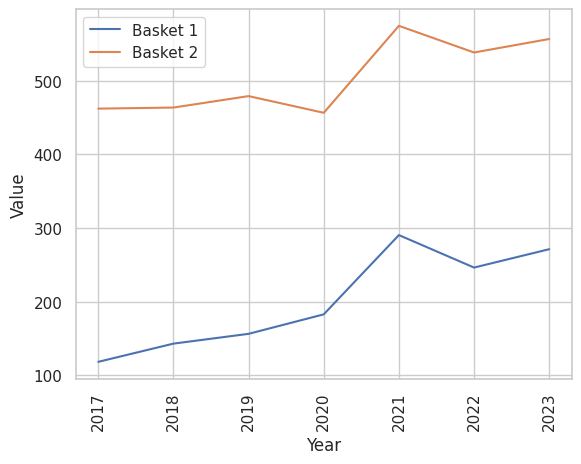

In [ ]:
basket.index = pd.to_datetime(basket.index)

# Group by year and compute the mean for each year
basket_yearly = basket.groupby(by=basket.index.year).mean()

# Create the line plot
plt.plot(basket_yearly.index, basket_yearly["basket1end"], label="Basket 1")
plt.plot(basket_yearly.index, basket_yearly["basket2end"], label="Basket 2")

# Set the x-axis tick labels to show only years
plt.xticks(basket_yearly.index, rotation=90)

# Add a legend and axis labels
plt.legend()
plt.xlabel("Year")
plt.ylabel("Value")

# Display the plot
plt.show()

Calculating the Spread
Now we can plot the spread of the two time series. In order to actually calculate the spread, we use a linear regression to get the coefficient for the linear combination to construct between our two securities, as mentioned with the Engle-Granger method before.

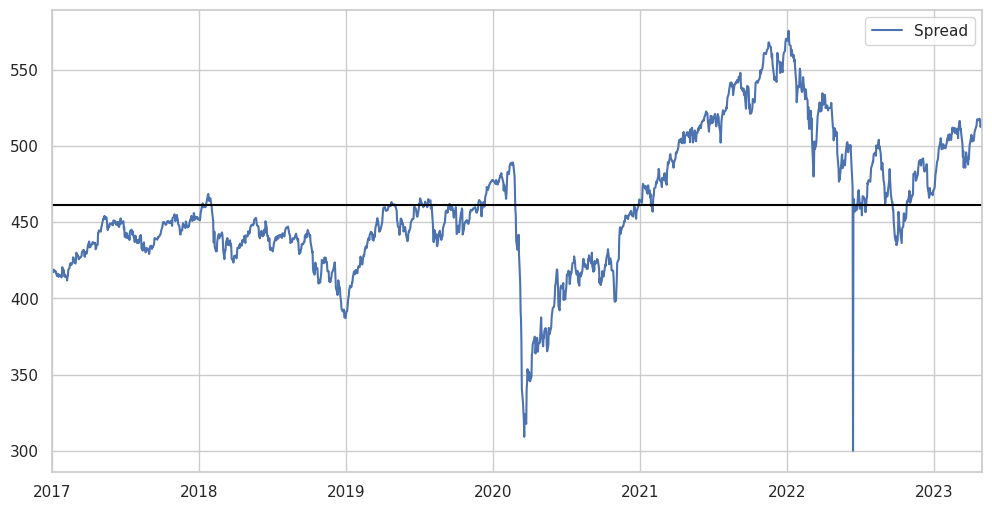

In [ ]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['basket1end']
b = results.params['basket1end']

spread = S2 - b * S1
spread[spread < 300] = 300
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')
plt.xlim('2017-01-01', '2023-05-01')
plt.legend(['Spread']);



Alternatively, we can examine the ratio between the two time series

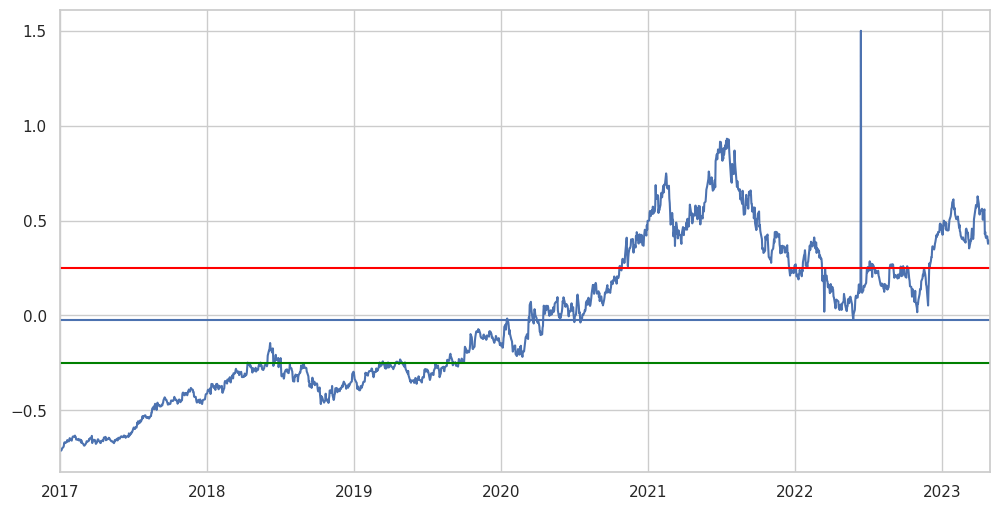

In [ ]:
ratio = S1/S2
def zscore(series):
    z= (series - series.mean()) / np.std(series)
    z[z > 1.5] = 1.5
    return z
zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean())
plt.axhline(0.25, color='red')
plt.axhline(-0.25, color='green')
plt.xlim('2017-01-01', '2023-05-01')
plt.show()


Splitting train and test

In [ ]:
print(len(ratio) * .70 ,len(ratio)) 
train = ratio[:1153]
test = ratio[1153:]

1153.6 1648


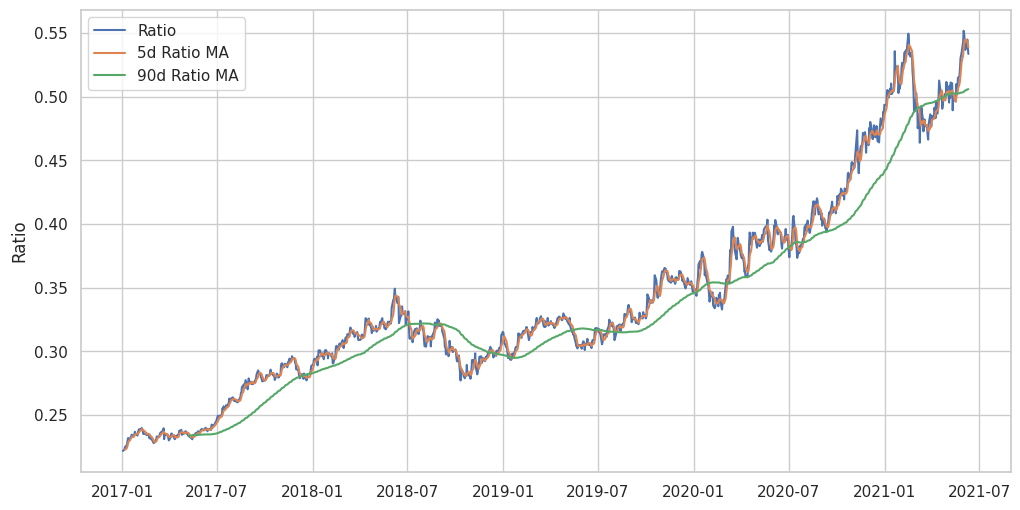

In [ ]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg90 = train.rolling(window=90, center=False).mean()

std_90 = train.rolling(window=90, center=False).std()
zscore_90_5 = (ratios_mavg5 - ratios_mavg90)/std_90
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg90.index, ratios_mavg90.values)
plt.legend(['Ratio', '5d Ratio MA', '90d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

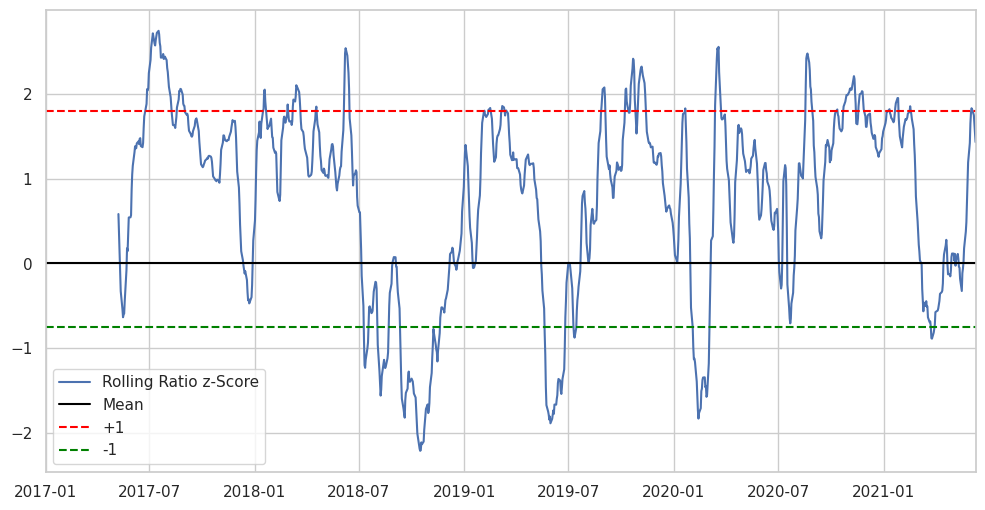

In [ ]:
plt.figure(figsize=(12,6))
zscore_90_5.plot()
plt.xlim('2017-01-1', '2021-06-10')
plt.axhline(0, color='black')
plt.axhline(1.8, color='red', linestyle='--')
plt.axhline(-0.75, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

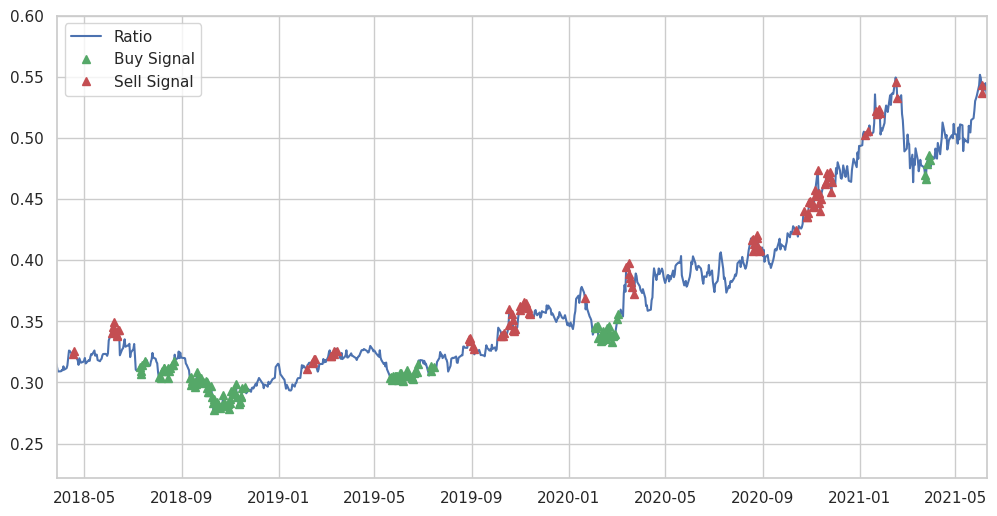

In [ ]:
plt.figure(figsize=(12,6))

train[90:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_90_5>-0.75] = 0
sell[zscore_90_5<1.8] = 0
buy[90:].plot(color='g', linestyle='None', marker='^')
sell[90:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), 0.6))
plt.xlim('2018-03-28 ','2021-06-10')
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

For the train dataset

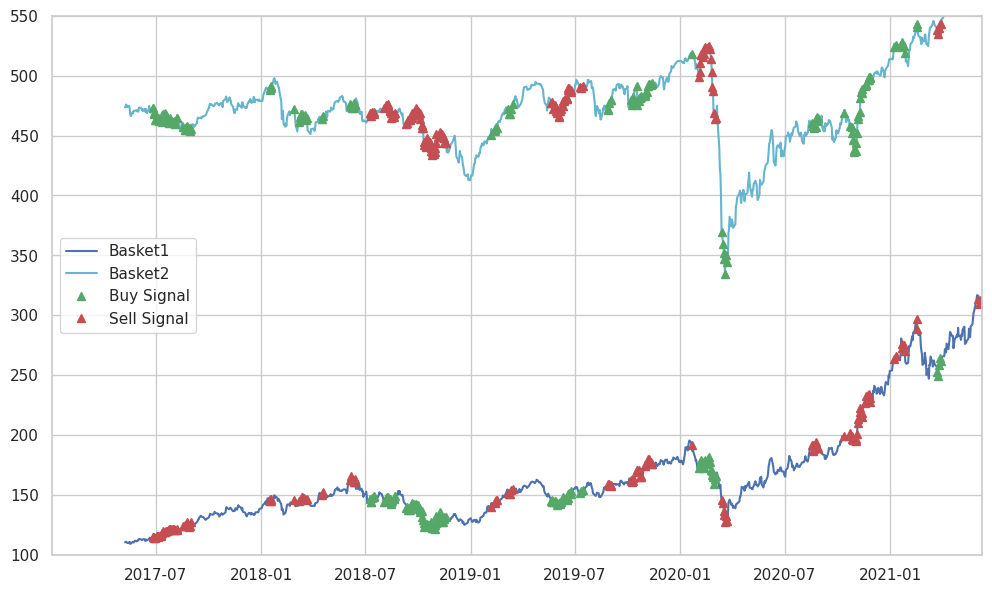

In [ ]:
plt.figure(figsize=(12,7))

ma1 = train.rolling(window=5, center=False).mean()
ma2 = train.rolling(window=90, center=False).mean()
std = train.rolling(window=90, center=False).std()
zscore_90_5 = (ma1 - ma2)/std

buy = train.copy()
sell = train.copy()
buy[zscore_90_5>-0.75] = 0
sell[zscore_90_5<1.8] = 0

S1 = basket['basket1end'][:1153]
S2 = basket['basket2end'][:1153]

S1[90:].plot(color='b')
S2[90:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]


buyR[90:].plot(color='g', linestyle='None', marker='^')
sellR[90:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(100, 550)
plt.xlim('2017-01-02', '2021-06-10')

plt.legend(['Basket1', 'Basket2', 'Buy Signal', 'Sell Signal'])
plt.show()

For the test data

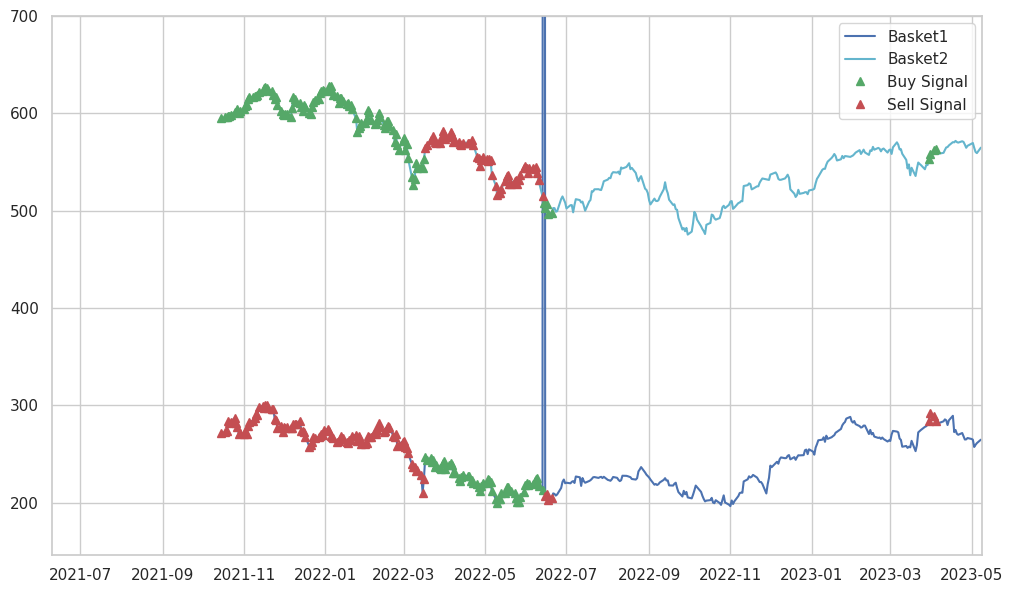

In [ ]:
plt.figure(figsize=(12,7))

ma1 = test.rolling(window=5, center=False).mean()
ma2 = test.rolling(window=200, center=False).mean()
std = test.rolling(window=200, center=False).std()
zscore_90_5 = (ma1 - ma2)/std

buy = test.copy()
sell = test.copy()
buy[zscore_90_5>-0.75] = 0
sell[zscore_90_5<1.8] = 0

S1 = basket['basket1end'][1153:]
S2 = basket['basket2end'][1153:]

S1[90:].plot(color='b')
S2[90:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]


buyR[90:].plot(color='g', linestyle='None', marker='^')
sellR[90:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.ylim(min(S1.min(), S2.min())-50, 700)
plt.xlim('2021-06-10', '2023-05-09')

plt.legend(['Basket1', 'Basket2', 'Buy Signal', 'Sell Signal'])
plt.show()

##Simulation of Trade

In [ ]:
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    count_trade=0
    for i in range(len(ratios)):
        if zscore[i] < -0.75:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            count_trade+=1
        elif zscore[i] > 1.8:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            count_trade+=1

        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            count_trade+=1
            
            
    return money, count_trade

In [ ]:
print(trade(basket['basket1end'].iloc[:1153],basket['basket2end'].iloc[:1153], 200,5))
trade(basket['basket1end'].iloc[1153:],basket['basket2end'].iloc[1153:], 200, 5)

(1955.5761127422722, 946)


(264519.5354763167, 285)

#Areas of Improvement and Further Steps: 

There are several things that can be improved upon.

1. Using more securities and more varied time ranges
For the pairs trading strategy cointegration test, I only used a handful of stocks. Naturally (and in practice) it would be more effective to use clusters within an industry. I only use the time range of only 5 years, which may not be representative of stock market volatility.

2. Dealing with overfitting
Anything related to data analysis and training models has much to do with the problem of overfitting. There are many different ways to deal with overfitting like validation, such as Kalman filters, and other statistical methods.

3. Realistic modelling of the stock market
The model lacks complexity and makes non relaistic assumption. It assumes that we can buy at the open prices and that there is no costs with the transactions. The model assume we can buy 8 stocks at opening prices. 

4. More advanced methods
The model is simple because it only deals with moving averages and ratios. Other more complex model include subjects such as the Hurst exponent, half-life mean reversion, and Kalman Filters.

5. It greatly depends on the windows you use and this is chosen arbitrary. 